In [45]:
from tensorflow.keras.datasets import reuters
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
import logging
logging.getLogger('tensorflow').disabled = True

In [6]:
# save np.load
np_load_old = np.load
# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

In [7]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [9]:
len(train_data), len(test_data)

(8982, 2246)

In [11]:
word_dict = reuters.get_word_index()

557056/550378 [==============================] - 0s 0us/step


In [13]:
reverse_word_dict = {word_dict[k]:k for k in word_dict}

In [17]:
x = train_data[0]
x = " ".join([reverse_word_dict.get(a-3,"?") for a in x])

In [20]:
len(train_data[0])

87

In [23]:
def vectorize_sequences(sequences,dimension=10000):
    result = np.zeros((len(sequences),dimension))
    for i, seq in enumerate(sequences):
        result[i,seq] = 1
    return result

In [107]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [106]:
# y_train = to_categorical(train_labels).astype("float32")
# y_test = to_categorical(test_labels).astype("float32")
y_train = np.asarray(train_labels)
y_test = np.asarray(test_labels)

In [108]:
x_val = x_train[:4000]
y_val = y_train[:4000]
partial_x_train = x_train[4000:]
partial_y_train = y_train[4000:]

In [42]:
partial_x_train

array([], shape=(0, 10000), dtype=float64)

In [78]:
model = Sequential()
model.add(Dense(64,input_shape=(10000,),activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(46,activation="softmax"))

In [79]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [80]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Train on 4982 samples, validate on 4000 samples
Epoch 1/20
4982/4982 [==============================] - 0s 74us/sample - loss: 3.5958 - acc: 0.0102 - val_loss: 3.3912 - val_acc: 0.0178
Epoch 2/20
4982/4982 [==============================] - 0s 48us/sample - loss: 3.2223 - acc: 0.1688 - val_loss: 3.1444 - val_acc: 0.3100
Epoch 3/20
4982/4982 [==============================] - 0s 48us/sample - loss: 2.9495 - acc: 0.3475 - val_loss: 2.9285 - val_acc: 0.3587
Epoch 4/20
4982/4982 [==============================] - 0s 54us/sample - loss: 2.6912 - acc: 0.3934 - val_loss: 2.7154 - val_acc: 0.3733
Epoch 5/20
4982/4982 [==============================] - 0s 58us/sample - loss: 2.4322 - acc: 0.4227 - val_loss: 2.5012 - val_acc: 0.4058
Epoch 6/20
4982/4982 [==============================] - 0s 48us/sample - loss: 2.1818 - acc: 0.4468 - val_loss: 2.3052 - val_acc: 0.4190
Epoch 7/20
4982/4982 [==============================] - 0s 48us/sample - loss: 1.9462 - acc: 0.5171 - val_loss: 2.1464 - val_acc: 

In [84]:
history_dict = history.history

In [81]:
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

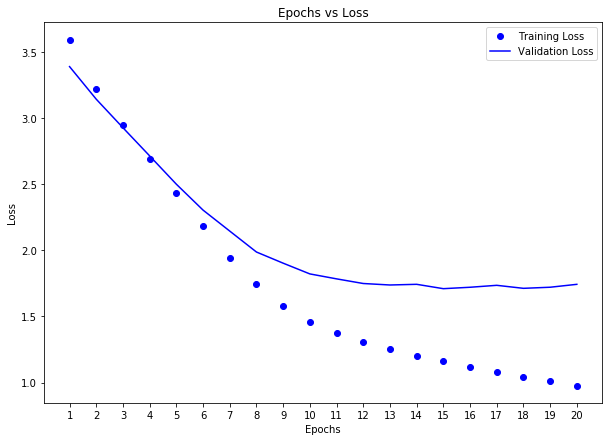

In [85]:
train_loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
epochs = len(history_dict["acc"])
plt.figure(figsize=(10,7))
plt.title("Epochs vs Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(range(1,epochs+1),train_loss,"bo",label="Training Loss")
plt.plot(range(1,epochs+1),val_loss,"b",label="Validation Loss")
plt.xticks(np.arange(min(range(1,epochs+1)),max(range(1,epochs+1))+1,step=1.0))
plt.legend()

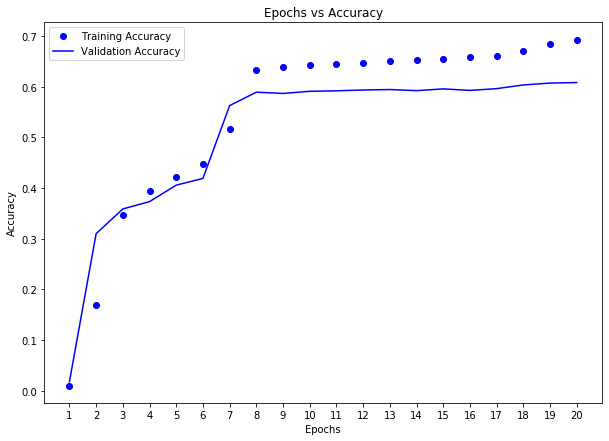

In [86]:
train_acc = history_dict["acc"]
val_acc = history_dict["val_acc"]
epochs = len(history_dict["acc"])
plt.figure(figsize=(10,7))
plt.title("Epochs vs Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(range(1,epochs+1),train_acc,"bo",label="Training Accuracy")
plt.plot(range(1,epochs+1),val_acc,"b",label="Validation Accuracy")
plt.xticks(np.arange(min(range(1,epochs+1)),max(range(1,epochs+1))+1,step=1.0))
plt.legend()

In [115]:
model = Sequential()
model.add(Dense(128,activation="relu"))
# model.add(Dense(2,activation="relu"))
model.add(Dense(46,activation="softmax"))

In [116]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [117]:
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)

Epoch 1/9
8982/8982 [==============================] - 0s 42us/sample - loss: 2.2095 - acc: 0.5975
Epoch 2/9
8982/8982 [==============================] - 0s 36us/sample - loss: 1.1125 - acc: 0.7790
Epoch 3/9
8982/8982 [==============================] - 0s 36us/sample - loss: 0.7570 - acc: 0.8503
Epoch 4/9
8982/8982 [==============================] - 0s 36us/sample - loss: 0.5547 - acc: 0.8912
Epoch 5/9
8982/8982 [==============================] - 0s 36us/sample - loss: 0.4191 - acc: 0.9149
Epoch 6/9
8982/8982 [==============================] - 0s 36us/sample - loss: 0.3310 - acc: 0.9316
Epoch 7/9
8982/8982 [==============================] - 0s 36us/sample - loss: 0.2690 - acc: 0.9391
Epoch 8/9
8982/8982 [==============================] - 0s 36us/sample - loss: 0.2212 - acc: 0.9464
Epoch 9/9
8982/8982 [==============================] - 0s 36us/sample - loss: 0.1932 - acc: 0.9500


In [118]:
model.evaluate(x_test,y_test)

2246/2246 [==============================] - 0s 58us/sample - loss: 0.8837 - acc: 0.8037


[0.8837375732160315, 0.8036509]

In [72]:
r = model.predict(x_test)

In [76]:
np.argmax(r[0])

3

In [77]:
np.sum(r[0])

1.0